In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm_notebook as tn
from astroML import stats as astroMLstats
#clear day=0
#cloudy day=1

In [6]:
#probabilities:
#p(clear|cloudy)=0.5
#p(cloudy|cloudy)=0.5
#p(clear|clear)=0.9
#p(cloudy|clear)=0.1

def forecast(a):
    
    b=0
    
    #sampling a value that decides how the day will be the next day
    
    x=np.random.uniform(0,1,1)
    
    #Upgrading the forecast for the following day
    if (a==0):
        
        if x<0.1:
            b=1
        else:
            b=0
    if (a==1):
        
        if x>0.5:
            b=0
        else:
            b=1
    return b

#def long_forecasting(a,N):
#    n=0
#    clear=0
#    cloudy=0
#    for i in range(0,N):
#        a=forecast(a)
#        if a==0:
#            clear+=1
#        if a==1:
#            cloudy+=1
#        n+=1
#    return(clear/n,cloudy/n)

def long_forecasting(a,N):
    n=1
    sun=0
    cloud=0
    clear=[]
    cloudy=[]
    for i in range(0,N):
        a=forecast(a)
        if a==0:
            sun+=1
        if a==1:
            cloud+=1
        clear.append(sun/n)
        cloudy.append(cloud/n)
        n+=1
    return(clear,cloudy)

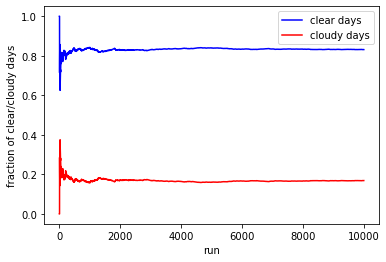

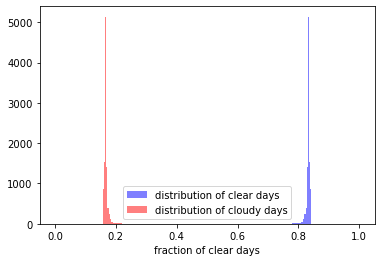

In [7]:
#note: for N=20 it takes nearly 40 seconds
#########################################

#Forecasting starting with a cloudy day (a=1)
a=1

#jump in days
N=10

#computing clear and cloudy days

#clear=np.array([long_forecasting(a,i)[0] for i in range(1,10000,N)])
#cloud=np.array([long_forecasting(a,i)[1] for i in range(1,10000,N)])
clear,cloud=long_forecasting(a,10000)
days=np.array([i for i in range(1,10000,N)])

#plotting the trace plot

plt.plot(clear,color='blue',label='clear days')
plt.plot(cloud,color='red',label='cloudy days')
plt.legend()
plt.xlabel('run')
plt.ylabel('fraction of clear/cloudy days')
plt.show()

#plotting the distribution

plt.hist(clear,bins=100,color='blue',alpha=0.5,label='distribution of clear days');
plt.hist(cloud,bins=100,color='red',alpha=0.5,label='distribution of cloudy days');
plt.legend()
plt.xlabel('fraction of clear days')
plt.show()

the median is:  0.8330434742352041
expected : 0.83
the sigmaG is:  0.002593960190861706


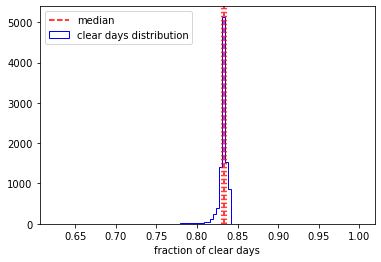

In [9]:
#summary statistics

median=np.median(clear)
sigmaG=astroMLstats.sigmaG(clear)
print('the median is: ',median)
print('expected : 0.83')
print('the sigmaG is: ',sigmaG)

#plotting

plt.hist(clear,bins=100,color='blue',histtype='step',label='clear days distribution');
plt.axvline(median,c='red',linestyle='--',label='median')
plt.axvline(median-sigmaG,c='red',linestyle=':')
plt.axvline(median+sigmaG,c='red',linestyle=':')
plt.legend()
plt.xlabel('fraction of clear days')
plt.show()

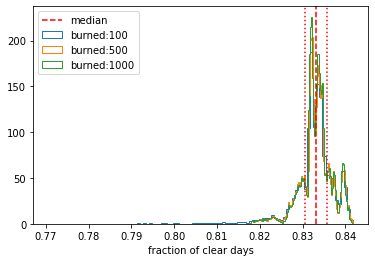

In [21]:
#burning some data and plotting the result

for burn in [100,500,1000]:
    burned_clear=clear[int(burn):]
    plt.hist(burned_clear,bins=100,density=True,histtype='step',label='burned:'+str(burn));
plt.axvline(median,c='red',linestyle='--',label='median')
plt.axvline(median-sigmaG,c='red',linestyle=':')
plt.axvline(median+sigmaG,c='red',linestyle=':')
plt.xlabel('fraction of clear days')

plt.legend()
plt.show()